PROBLEM 1

In [927]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn 
import sklearn
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve

1.1.Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. 

In [928]:
data_df= pd.read_csv("Election_Data.csv")
data_df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [929]:
data_df=data_df.drop('Unnamed: 0',axis=1)
data_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [930]:
data_df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [836]:
data_df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [837]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [838]:
data_df.shape

(1525, 9)

In [839]:
dups=data_df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
data_df[dups]

Total no of duplicate values = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [840]:
for feature in data_df.columns:
    if data_df[feature].dtype=='object':
           print(feature.upper() ," ",data_df[feature].nunique())
           print(data_df[feature].value_counts().sort_values())

VOTE   2
Conservative     462
Labour          1063
Name: vote, dtype: int64
GENDER   2
male      713
female    812
Name: gender, dtype: int64


1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will 

Text(0.5, 1.0, 'Blair boxplot')

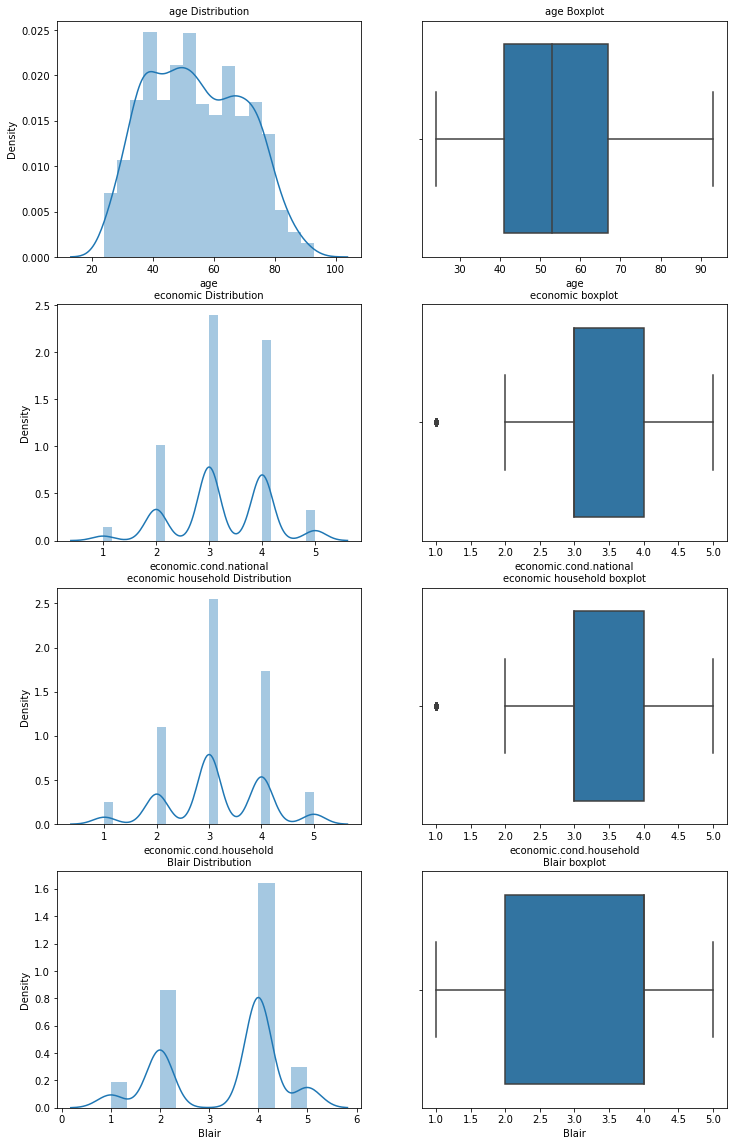

In [841]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12,20)
a = sns.distplot(data_df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(data_df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=10)

a=sns.distplot(data_df['economic.cond.national'], ax=axes[1][0])
a.set_title("economic Distribution",fontsize=10)

a=sns.boxplot(data_df['economic.cond.national'],orient="v", ax=axes[1][1])
a.set_title("economic boxplot", fontsize=10)

a=sns.distplot(data_df['economic.cond.household'], ax=axes[2][0])
a.set_title("economic household Distribution",fontsize=10)

a=sns.boxplot(data_df['economic.cond.household'],orient="v", ax=axes[2][1])
a.set_title("economic household boxplot", fontsize=10)

a=sns.distplot(data_df['Blair'], ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)

a=sns.boxplot(data_df['Blair'],orient="v", ax=axes[3][1])
a.set_title("Blair boxplot", fontsize=10)

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will 

Text(0.5, 1.0, 'political knowledge boxplot')

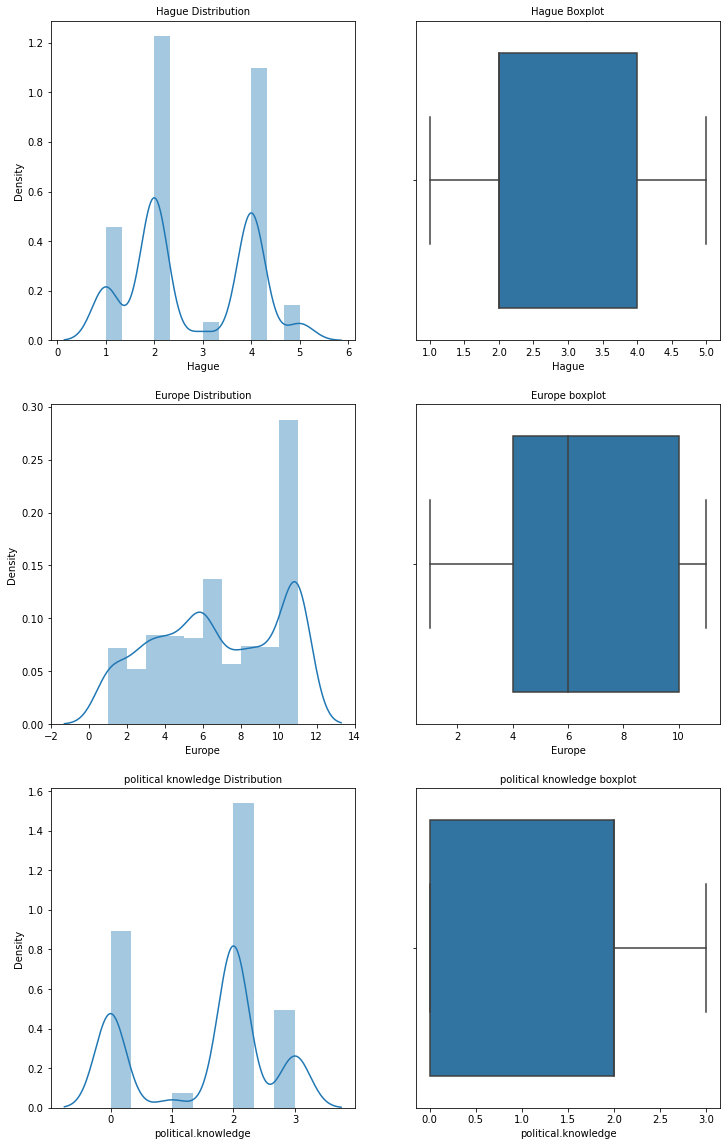

In [842]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12,20)
a = sns.distplot(data_df['Hague'] , ax=axes[0][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(data_df['Hague'] , orient = "v" , ax=axes[0][1])
a.set_title("Hague Boxplot",fontsize=10)

a=sns.distplot(data_df['Europe'], ax=axes[1][0])
a.set_title("Europe Distribution",fontsize=10)

a=sns.boxplot(data_df['Europe'],orient="v", ax=axes[1][1])
a.set_title("Europe boxplot", fontsize=10)

a=sns.distplot(data_df['political.knowledge'], ax=axes[2][0])
a.set_title("political knowledge Distribution",fontsize=10)

a=sns.boxplot(data_df['political.knowledge'],orient="v", ax=axes[2][1])
a.set_title("political knowledge boxplot", fontsize=10)

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


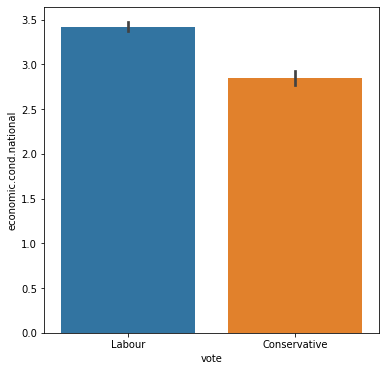

In [932]:
plt.figure(figsize=(6,6))
sns.barplot(data_df["vote"], data_df['economic.cond.national']) 
plt.show()

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


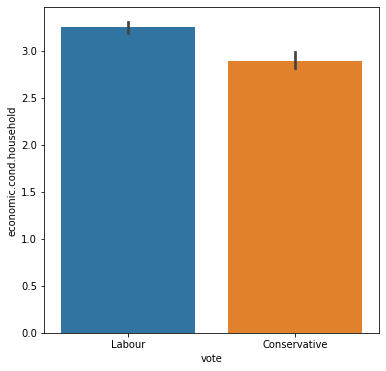

In [933]:
plt.figure(figsize=(6,6))
sns.barplot(data_df["vote"], data_df['economic.cond.household']) 
plt.show()

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


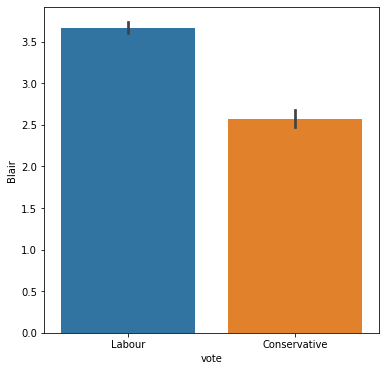

In [934]:
plt.figure(figsize=(6,6))
sns.barplot(data_df["vote"], data_df['Blair']) 
plt.show()

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


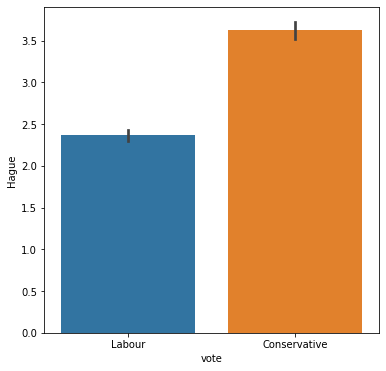

In [935]:
plt.figure(figsize=(6,6))
sns.barplot(data_df["vote"], data_df['Hague']) 
plt.show()

C:\Users\MAHE\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


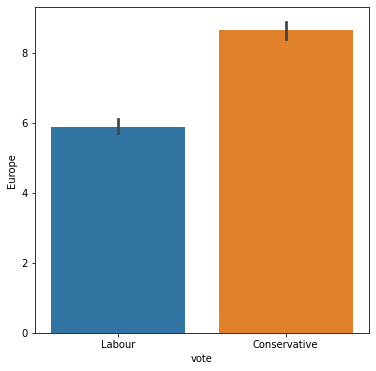

In [936]:
plt.figure(figsize=(6,6))
sns.barplot(data_df["vote"], data_df['Europe']) 
plt.show()

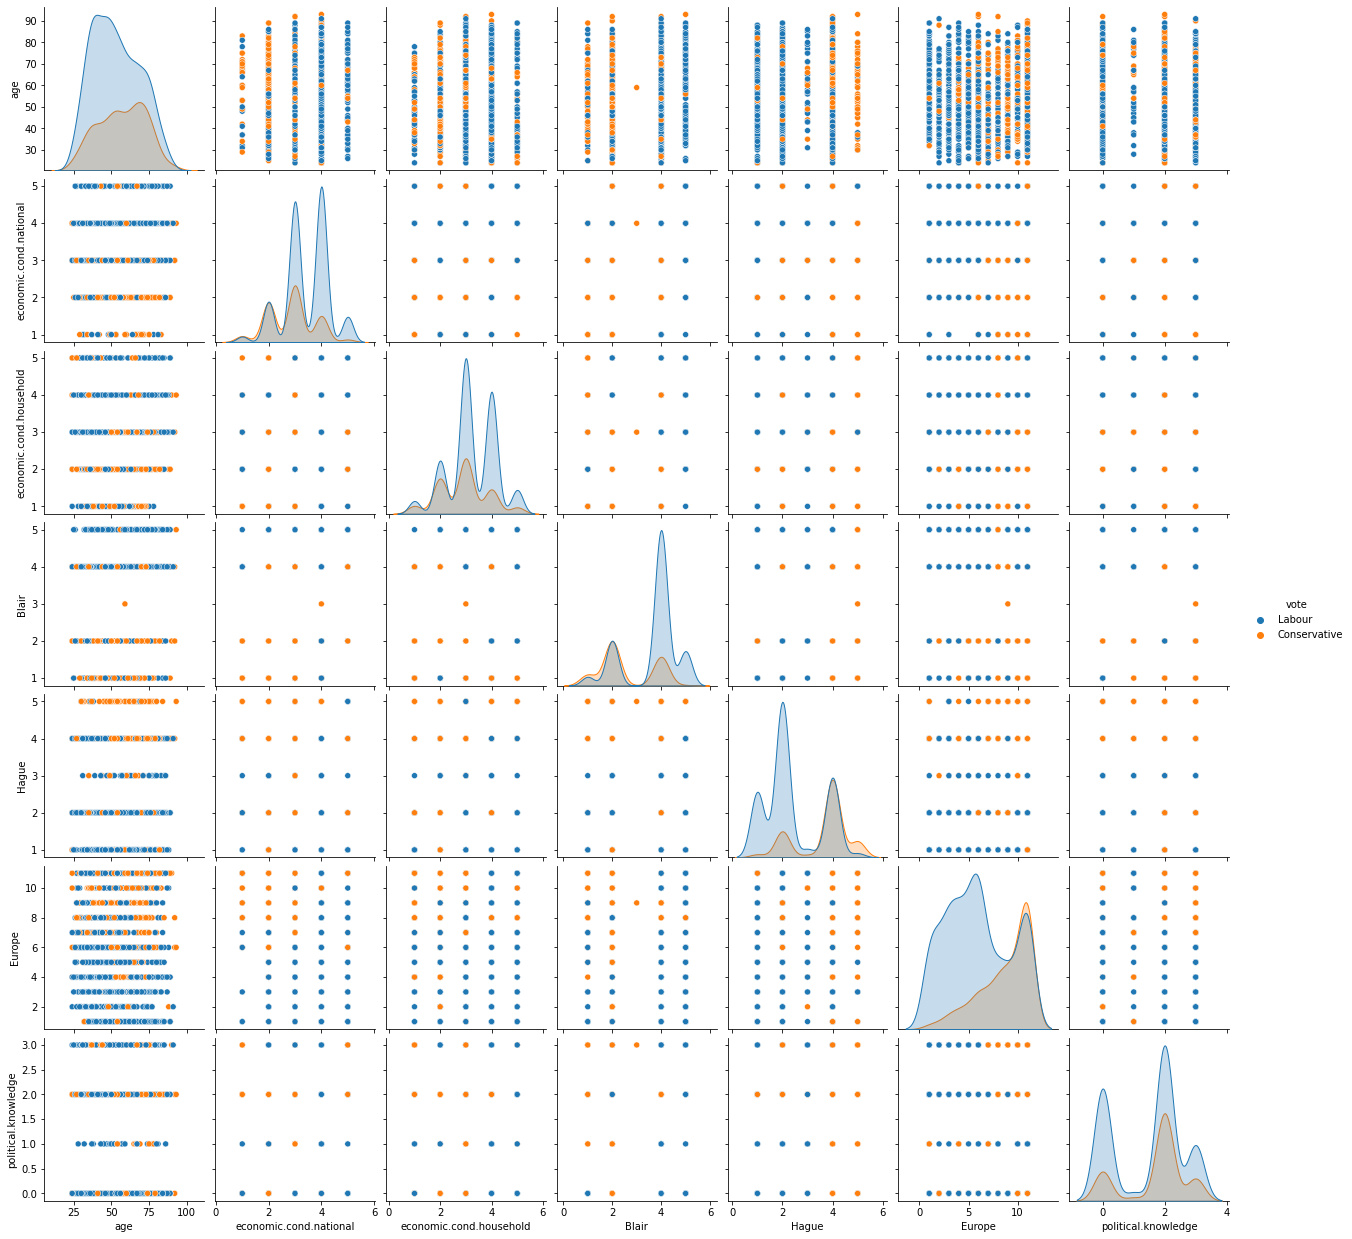

In [848]:
sns.pairplot(data_df, hue='vote')

<AxesSubplot:>

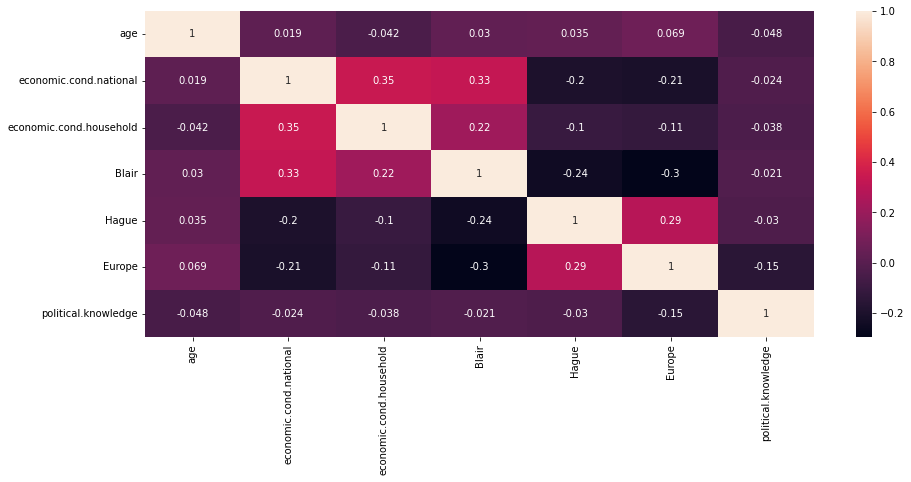

In [849]:
plt.figure(figsize=(15,6))
sns.heatmap(data_df.corr(),annot=True)

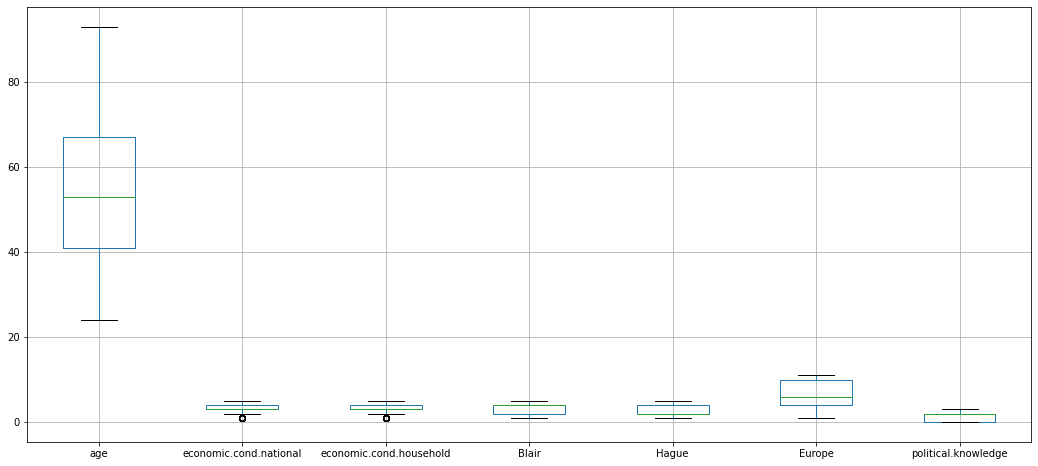

In [850]:
plt.figure(figsize=(18,8))
data_df.boxplot()
plt.show()

1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models.

In [851]:
for col in data_df.columns: 
    if data_df[col].dtype == 'object': 
        print('\n')
        print('Column Name:',col)
        print(pd.Categorical(data_df[col].unique()))
        print(pd.Categorical(data_df[col].unique()).codes)
        data_df[col] = pd.Categorical(data_df[col]).codes



Column Name: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


Column Name: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [852]:
cat1 = ['vote', 'gender']

In [853]:
df =pd.get_dummies(data_df, columns=cat1,drop_first=True)

In [854]:
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_1,gender_1
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [855]:
df=df.rename(columns={'vote_1':'Is_a_Labour_or_not' ,'gender_1':'Is_a_Male_or_not'},inplace= False)
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,Is_a_Labour_or_not,Is_a_Male_or_not
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [856]:
X=df.drop('Is_a_Labour_or_not',axis=1)  
Y=df.pop('Is_a_Labour_or_not')

In [937]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=0)

1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

In [938]:
#LOGISTIC REGRESSION
Logistic_model = LogisticRegression()
Logistic_model.fit(X_train, Y_train)

LogisticRegression()

In [939]:
#LOGISTIC REGRESSION
train_pred_lg=lgmodel.predict(X_train)
test_pred_lg =lgmodel.predict(X_test)

In [940]:
#LOGISTIC REGRESSION
modelhol=df.copy()
modelhol['predict_log_class']=lgmodel.predict(X)

In [941]:
#LOGISTIC REGRESSION
print("Accuracy score  for Logistic regression  train variables ")
lgmodel_train_score = lgmodel.score(X_train, Y_train)
print (lgmodel_train_score)

print("Accuracy score for Logistic regression test variables ")
lgmodel_test_score = lgmodel.score(X_test, Y_test)
print (lgmodel_test_score)

Accuracy score  for Logistic regression  train variables 
0.8359887535145267
Accuracy score for Logistic regression test variables 
0.834061135371179


 confusion matrix  


Text(0.5, 1.0, 'Test Data')

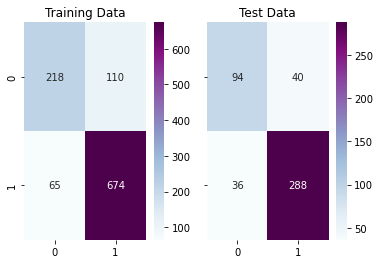

In [992]:
#LOGISTIC REGRESSION
print(" confusion matrix  ")
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
plot_0 = sns.heatmap(metrics.confusion_matrix(Y_train, train_pred_lg),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap(metrics.confusion_matrix(Y_test, test_pred_lg),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][1]);
a[0][1].set_title('Test Data')

In [943]:
#LOGISTIC REGRESSION
print("Logistic regression Classfication report  ")
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,train_pred_lg),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test, test_pred_lg),'\n')

Logistic regression Classfication report  
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.77      0.66      0.71       328
           1       0.86      0.91      0.89       739

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.72      0.70      0.71       134
           1       0.88      0.89      0.88       324

    accuracy                           0.83       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.83      0.83      0.83       458
 



AUC and ROC FOR Logistic regression
AUC for the Training Data: 0.890
AUC for the Test Data: 0.887


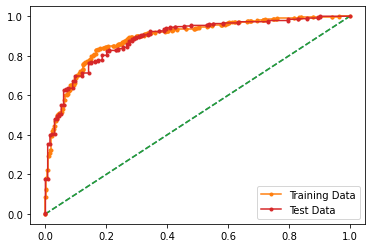

In [944]:
#LOGISTIC REGRESSION
print("AUC and ROC FOR Logistic regression")
lg_pred_prob_train = lgmodel.predict_proba(X_train)
lg_pred_prob_train=lg_pred_prob_train[:,1]
lg_pred_prob_test = lgmodel.predict_proba(X_test)
lg_pred_prob_test =lg_pred_prob_test[:,1]

#training data
#AUC
lg_train_auc = metrics.roc_auc_score(Y_train,lg_pred_prob_train)
print('AUC for the Training Data: %.3f' % lg_train_auc)
#roc curve
lg_train_fpr, lg_train_tpr, thresholds = metrics.roc_curve(Y_train,lg_pred_prob_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lg_train_fpr, lg_train_tpr, marker='.',label = 'Training Data')


#test data
#AUC
lg_test_auc = metrics.roc_auc_score(Y_test,lg_pred_prob_test)
print('AUC for the Test Data: %.3f' % lg_test_auc)
#roc curve
lg_test_fpr,lg_test_tpr, thresholds = metrics.roc_curve(Y_test,lg_pred_prob_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lg_test_fpr, lg_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [949]:
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : [0.001,0.01,0.1,1,10,100,1000],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [957]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)  
clf.fit(X_train,Y_train)

C:\Users\MAHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\MAHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\MAHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\MAHE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [962]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.8369687885734438


In [993]:
logreg = LogisticRegression(C = 0.1, 
                            penalty = 'l2', 
                            solver = 'newton-cg')
logreg.fit(X_train,Y_train)
y_pred_train=logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)
print("Accuracy for test:",logreg.score(X_test, Y_test))
print("Accuracy for train:",logreg.score(X_train, Y_train))

Accuracy for test: 0.8362445414847162
Accuracy for train: 0.8359887535145267


 confusion matrix


Text(0.5, 1.0, 'Test Data')

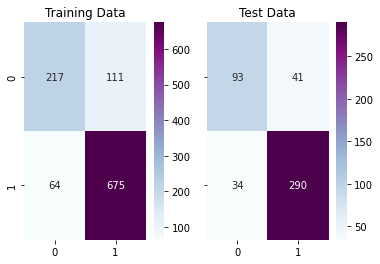

In [994]:
#LOGISTIC REGRESSION
print(" confusion matrix")
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
plot_0 = sns.heatmap(metrics.confusion_matrix(Y_train, y_pred_train),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap(metrics.confusion_matrix(Y_test, y_pred_test),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][1]);
a[0][1].set_title('Test Data')

In [965]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,y_pred_train),'\n')


Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.77      0.66      0.71       328
           1       0.86      0.91      0.89       739

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067
 



AUC and ROC FOR Logistic regression
AUC for the Training Data: 0.890
AUC for the Test Data: 0.886


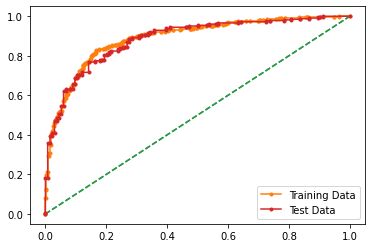

In [991]:
print("AUC and ROC FOR Logistic regression")
lg_pred_prob_train = logreg.predict_proba(X_train)
lg_pred_prob_train=lg_pred_prob_train[:,1]
lg_pred_prob_test = logreg.predict_proba(X_test)
lg_pred_prob_test =lg_pred_prob_test[:,1]

#training data
#AUC
lg_train_auc = metrics.roc_auc_score(Y_train,lg_pred_prob_train)
print('AUC for the Training Data: %.3f' % lg_train_auc)
#roc curve
lg_train_fpr, lg_train_tpr, thresholds = metrics.roc_curve(Y_train,lg_pred_prob_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lg_train_fpr, lg_train_tpr, marker='.',label = 'Training Data')


#test data
#AUC
lg_test_auc = metrics.roc_auc_score(Y_test,lg_pred_prob_test)
print('AUC for the Test Data: %.3f' % lg_test_auc)
#roc curve
lg_test_fpr,lg_test_tpr, thresholds = metrics.roc_curve(Y_test,lg_pred_prob_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lg_test_fpr, lg_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [967]:
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test, y_pred_test)),'\n'

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.73      0.69      0.71       134
           1       0.88      0.90      0.89       324

    accuracy                           0.84       458
   macro avg       0.80      0.79      0.80       458
weighted avg       0.83      0.84      0.83       458



(None, '\n')

In [896]:
#LDA
clf = LinearDiscriminantAnalysis()
ldamodel=clf.fit(X_train, Y_train)
ldamodel

LinearDiscriminantAnalysis()

In [574]:
train_pred_lda=ldamodel.predict(X_train)
test_pred_lda =ldamodel.predict(X_test)

In [575]:
modelhol['predict_LDA_class']=ldamodel.predict(X)

In [576]:
#LINEAR DISCRIMINANT ANALYSIS

print("Accuracy score  for LDA  train variables ")
ldamodel_train_score = ldamodel.score(X_train, Y_train)
print(ldamodel_train_score)

print("Accuracy score for LDA test variables ")
ldamodel_test_score = ldamodel.score(X_test, Y_test)
print(ldamodel_test_score)

Accuracy score  for LDA  train variables 
0.8331771321462043
Accuracy score for LDA test variables 
0.8362445414847162


 confusion matrix


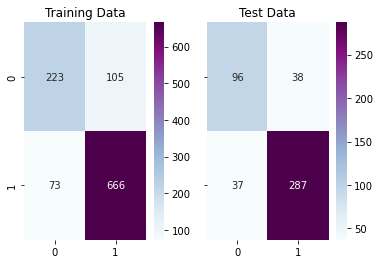

In [995]:
#LINEAR DISCRIMINANT ANALYSIS

print(" confusion matrix")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train, train_pred_lda)),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test, test_pred_lda)),annot=True,fmt='.5g',cmap='BuPu',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [579]:
#LINEAR DISCRIMINANT ANALYSIS

print("LDA Classfication report  ")

print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,train_pred_lda),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test, test_pred_lda),'\n')

LDA Classfication report  
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.75      0.68      0.71       328
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1067
   macro avg       0.81      0.79      0.80      1067
weighted avg       0.83      0.83      0.83      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.72      0.72      0.72       134
           1       0.88      0.89      0.88       324

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458
 



AUC and ROC FOR LDA
AUC for the Training Data: 0.890
AUC for the Test Data: 0.886


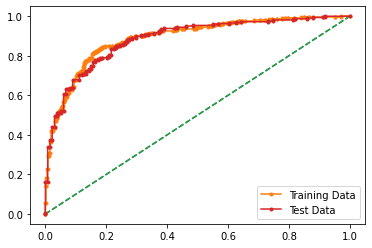

In [581]:
#LINEAR DISCRIMINANT ANALYSIS

print("AUC and ROC FOR LDA")
lda_pred_prob_train = ldamodel.predict_proba(X_train)
lda_pred_prob_train=lda_pred_prob_train[:,1]

lda_pred_prob_test = ldamodel.predict_proba(X_test)
lda_pred_prob_test=lda_pred_prob_test[:,1]

#training data
#AUC
lda_train_auc = metrics.roc_auc_score(Y_train,lda_pred_prob_train)
print('AUC for the Training Data: %.3f' % lda_train_auc)
#roc curve
lda_train_fpr, lda_train_tpr, thresholds = metrics.roc_curve(Y_train,lda_pred_prob_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, marker='.',label = 'Training Data')


#test data
#AUC
lda_test_auc = metrics.roc_auc_score(Y_test,lda_pred_prob_test)
print('AUC for the Test Data: %.3f' % lda_test_auc)
#roc curve
lda_test_fpr, lda_test_tpr, thresholds = metrics.roc_curve(Y_test,lda_pred_prob_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

In [582]:
#Naïve Bayes Model

NB_model=GaussianNB()
NB_model.fit(X_train, Y_train)
GaussianNB()

GaussianNB()

In [583]:
#Naïve Bayes Model
Y_train_predict=NB_model.predict(X_train)
model_score=NB_model.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train,Y_train_predict))

print(metrics.classification_report(Y_train,Y_train_predict))

0.8388003748828491
[[235  93]
 [ 79 660]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       328
           1       0.88      0.89      0.88       739

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



the auc 0.887 


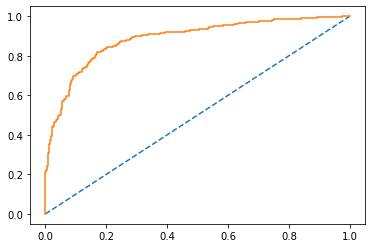

In [584]:
#Naïve Bayes Model
probs_train=NB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr)

In [969]:
#Naïve Bayes Model
Y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test,Y_test_predict))

print(metrics.classification_report(Y_test,Y_test_predict))

0.8253275109170306
[[ 99  35]
 [ 45 279]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       134
           1       0.89      0.86      0.87       324

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.79       458
weighted avg       0.83      0.83      0.83       458



the auc  0.887 


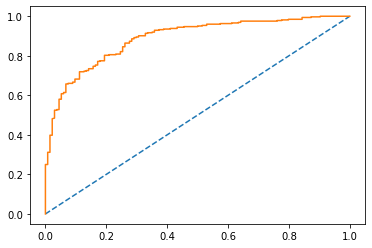

In [970]:
#Naïve Bayes Model
probs_test=NB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc  %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

In [587]:
#KNN
for col in data_df.columns: 
    if data_df[col].dtype == 'object': 
        print('\n')
        print('Column Name:',col)
        print(pd.Categorical(data_df[col].unique()))
        print(pd.Categorical(data_df[col].unique()).codes)
        data_df[col] = pd.Categorical(data_df[col]).codes

In [588]:
cat1 = ['vote', 'gender']


In [589]:
df2 =pd.get_dummies(data_df, columns=cat1,drop_first=True)
df2.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_1,gender_1
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [590]:
df2=df2.rename(columns={'vote_1':'Is_a_Labour_or_not' ,'gender_1':'Is_a_Male_or_not'},inplace= False)
df2.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,Is_a_Labour_or_not,Is_a_Male_or_not
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [591]:
#KNN
x=df2.drop("Is_a_Labour_or_not",axis=1)
y=df2.pop('Is_a_Labour_or_not')

In [592]:
x.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,Is_a_Male_or_not
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [593]:
#KNN
from scipy.stats import zscore

In [594]:
x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','IsMale_or_not']]=x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','Is_a_Male_or_not']].apply(zscore)

In [595]:
x.head(4)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,Is_a_Male_or_not,IsMale_or_not
0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,0,-0.937059
1,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,1,1.067169
2,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,1,1.067169
3,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,0,-0.937059


In [652]:
#KNN
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=1)

In [653]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [654]:
#KNN train
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)

0.8678915135608049


the auc 0.932 


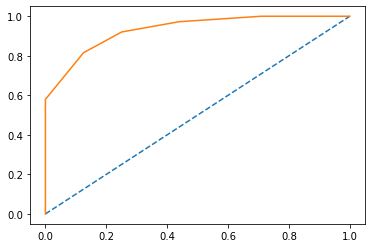

In [655]:
#KNN train
probs_train=KNN_model.predict_proba(x_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);


In [656]:
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

[[263  88]
 [ 63 729]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       351
           1       0.89      0.92      0.91       792

    accuracy                           0.87      1143
   macro avg       0.85      0.83      0.84      1143
weighted avg       0.87      0.87      0.87      1143



In [658]:
#KNN test


y_test_predict=KNN_model.predict(x_test)

KNN_model_score=KNN_model.score(x_test, y_test)

print(KNN_model_score)


0.824607329842932


In [659]:
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

[[ 81  30]
 [ 37 234]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       111
           1       0.89      0.86      0.87       271

    accuracy                           0.82       382
   macro avg       0.79      0.80      0.79       382
weighted avg       0.83      0.82      0.83       382



the auc curve 0.870 


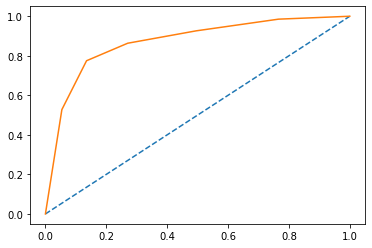

In [660]:
probs_test=KNN_model.predict_proba(x_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)


In [661]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [662]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8521434820647419
[[253  98]
 [ 71 721]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       351
           1       0.88      0.91      0.90       792

    accuracy                           0.85      1143
   macro avg       0.83      0.82      0.82      1143
weighted avg       0.85      0.85      0.85      1143



In [608]:
y_test_predict=KNN_model.predict(x_test)
KNN_model_score=KNN_model.score(x_test,y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))



0.8350785340314136
[[ 84  27]
 [ 36 235]]
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       111
           1       0.90      0.87      0.88       271

    accuracy                           0.84       382
   macro avg       0.80      0.81      0.80       382
weighted avg       0.84      0.84      0.84       382



In [622]:
KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [623]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8678915135608049
[[263  88]
 [ 63 729]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       351
           1       0.89      0.92      0.91       792

    accuracy                           0.87      1143
   macro avg       0.85      0.83      0.84      1143
weighted avg       0.87      0.87      0.87      1143



In [625]:
y_test_predict=KNN_model.predict(x_test)
KNN_model_score=KNN_model.score(x_test,y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.824607329842932
[[ 81  30]
 [ 37 234]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       111
           1       0.89      0.86      0.87       271

    accuracy                           0.82       382
   macro avg       0.79      0.80      0.79       382
weighted avg       0.83      0.82      0.83       382



In [665]:
acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    KNN_model = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    y_test_predict=KNN_model.predict(x_test)
    acc[i-1] = metrics.accuracy_score(y_test, y_test_predict)

acc

array([0.76701571, 0.7460733 , 0.80366492, 0.80366492, 0.82460733,
       0.82198953, 0.83507853, 0.81413613, 0.81675393, 0.81675393,
       0.82198953, 0.82198953, 0.82460733, 0.81937173, 0.81413613,
       0.82722513, 0.82198953, 0.82722513, 0.82722513, 0.83769634])

the auc curve 0.904 


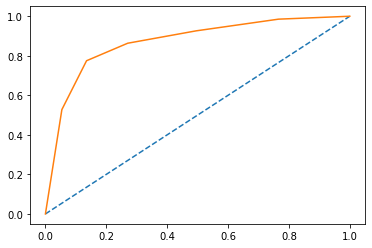

In [642]:
probs_train=knn.predict_proba(x_train)
probs_train=probs_train[:,1]
auc=roc_auc_score(y_train,probs_train)
print("the auc curve %.3f " % auc)

train_fpr,train_tpr,train_threshold=roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)


the auc curve 0.898 


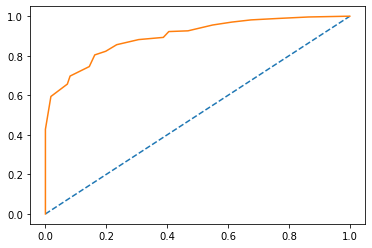

In [643]:
probs_test=knn.predict_proba(x_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)


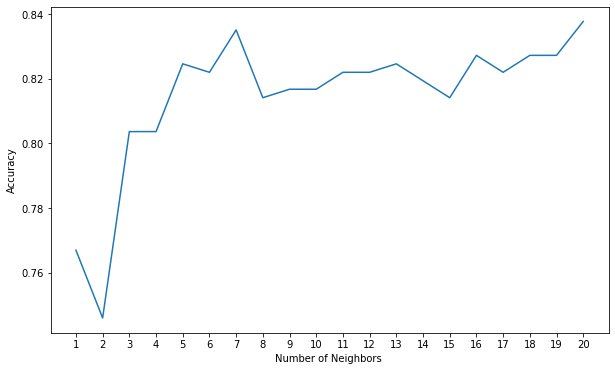

In [666]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [984]:
grid_params = { 'n_neighbors' : [9,10,11,12,13,14],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=500, n_jobs = -1)
g_res = gs.fit(x_train, y_train)

Fitting 500 folds for each of 36 candidates, totalling 18000 fits


C:\Users\MAHE\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 351 members, which is less than n_splits=500.
  UserWarning,


In [703]:
g_res.best_score_

0.8286666666666667

In [971]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 12, 'weights': 'distance'}

In [972]:
knn = KNeighborsClassifier(n_neighbors = 12, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=12)

In [973]:
y_train_predict= knn.predict(x_train)
y_test_predict = knn.predict(x_test)

In [974]:
print('Training set accuracy: ', metrics.accuracy_score(y_train,y_train_predict))
print('Test set accuracy: ',metrics.accuracy_score(y_test,y_test_predict))

Training set accuracy:  0.8468941382327209
Test set accuracy:  0.8219895287958116


In [980]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       351
           1       0.89      0.89      0.89       792

    accuracy                           0.85      1143
   macro avg       0.82      0.82      0.82      1143
weighted avg       0.85      0.85      0.85      1143



Auc  0.909 


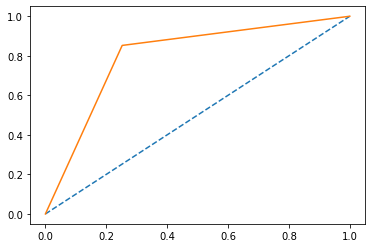

In [982]:
probs_train=knn.predict_proba(x_train)
probs_train=probs_train[:,1]
auc=roc_auc_score(y_train,probs_train)
print("Auc  %.3f " % auc)

train_fpr,train_tpr,train_threshold=roc_curve(y_train,y_train_predict)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

In [747]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_predict))

[[ 83  28]
 [ 40 231]]


In [748]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       111
           1       0.89      0.85      0.87       271

    accuracy                           0.82       382
   macro avg       0.78      0.80      0.79       382
weighted avg       0.83      0.82      0.82       382



Auc  0.891 


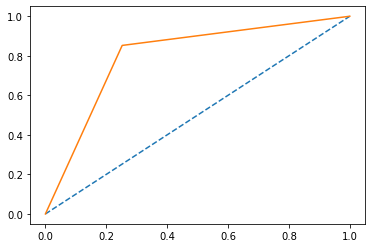

In [983]:
probs_test=knn.predict_proba(x_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("Auc  %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test, y_test_predict)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

In [753]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, x, y, cv =12)

In [754]:
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.825572096456693


1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

In [811]:
#BAGGING

from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test= train_test_split(X,Y,test_size=0.30,random_state=1)

In [812]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [815]:
cart=RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100, random_state=1)

Bagging_model.fit(X_train,Y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [816]:
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score=Bagging_model.score(X_train,Y_train)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))


0.9653233364573571
[[304  28]
 [  9 726]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       332
           1       0.96      0.99      0.98       735

    accuracy                           0.97      1067
   macro avg       0.97      0.95      0.96      1067
weighted avg       0.97      0.97      0.97      1067



AUC: 0.997


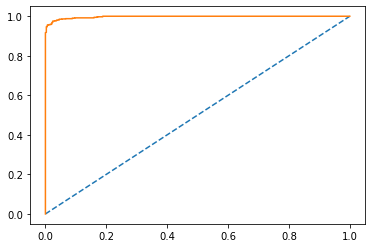

In [817]:
probs = Bagging_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

In [818]:
y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score=Bagging_model.score(X_test,Y_test)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8362445414847162
[[ 92  38]
 [ 37 291]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       130
           1       0.88      0.89      0.89       328

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458



AUC: 0.897


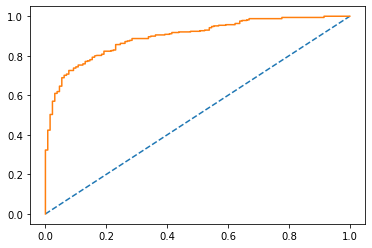

In [819]:
probs_test = Bagging_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

In [913]:
param_grid = {'base_estimator__max_depth' : [1,2,3,4,5],'max_samples' : [0.05, 0.1, 0.2, 0.5]}

clf = GridSearchCV(BaggingClassifier(RandomForestClassifier(),n_estimators=400, random_state=1),param_grid)
clf.fit(X_train, Y_train)

GridSearchCV(estimator=BaggingClassifier(base_estimator=RandomForestClassifier(),
                                         n_estimators=400, random_state=1),
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5]})

In [914]:
clf.best_params_

{'base_estimator__max_depth': 5, 'max_samples': 0.1}

In [915]:
best_grid = clf.best_estimator_

In [916]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [923]:
Bagging_model_score=best_grid.score(X_train,Y_train)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_train,ytrain_predict))
print(metrics.classification_report(Y_train,ytrain_predict))

0.8397375820056232
[[201 127]
 [ 44 695]]
              precision    recall  f1-score   support

           0       0.82      0.61      0.70       328
           1       0.85      0.94      0.89       739

    accuracy                           0.84      1067
   macro avg       0.83      0.78      0.80      1067
weighted avg       0.84      0.84      0.83      1067



AUC: 0.914


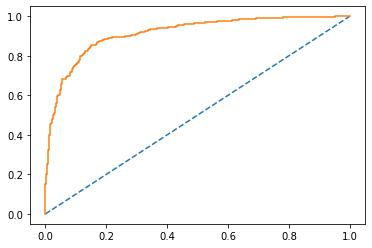

In [925]:
probs = best_grid.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

In [924]:
Bagging_model_score=best_grid.score(X_test,Y_test)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_test,ytest_predict))
print(metrics.classification_report(Y_test,ytest_predict))

0.8558951965065502
[[ 90  44]
 [ 22 302]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       134
           1       0.87      0.93      0.90       324

    accuracy                           0.86       458
   macro avg       0.84      0.80      0.82       458
weighted avg       0.85      0.86      0.85       458



AUC: 0.891


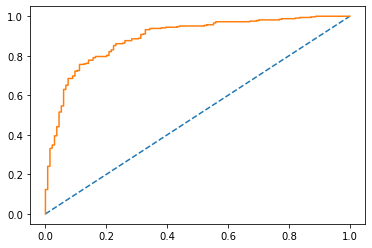

In [926]:
probs_test = best_grid.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)

In [775]:
#BOOSTING
#ADA BOOSTING

from sklearn.ensemble import AdaBoostClassifier
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [776]:
y_train_predict=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,Y_train)
print(ADB_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8472352389878163
[[238  94]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



AUC: 0.913


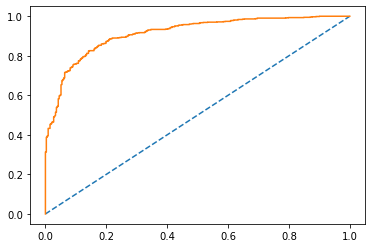

In [777]:
probs = ADB_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

In [778]:
y_test_predict = ADB_model.predict(X_test)
ADB_model_score = ADB_model.score(X_test, Y_test)
print(ADB_model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8187772925764192
[[ 40  90]
 [104 224]]
              precision    recall  f1-score   support

           0       0.28      0.31      0.29       130
           1       0.71      0.68      0.70       328

    accuracy                           0.58       458
   macro avg       0.50      0.50      0.49       458
weighted avg       0.59      0.58      0.58       458



AUC: 0.879


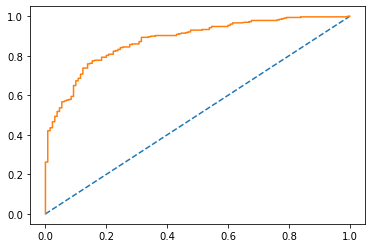

In [779]:
probs_test = ADB_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

In [780]:
#GRADIENT BOOSTING

from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=1)

In [781]:
y_train_predict = gbc_model.predict(X_train)
gbc_model_score = gbc_model.score(X_train, Y_train)
print(gbc_model_score)
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print(metrics.classification_report(Y_train, y_train_predict))

0.8865979381443299
[[ 95 237]
 [219 516]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



AUC: 0.939


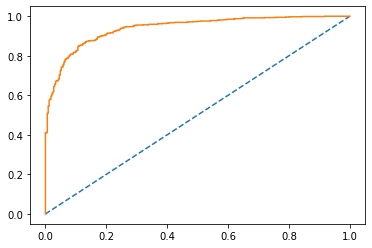

In [985]:
probs =gbc_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

In [989]:
y_test_predict = gbc_model.predict(X_test)
gbc_model_score = gbc_model.score(X_test, Y_test)
print(gbc_model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8537117903930131
[[ 99  35]
 [ 45 279]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       134
           1       0.89      0.86      0.87       324

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC: 0.931


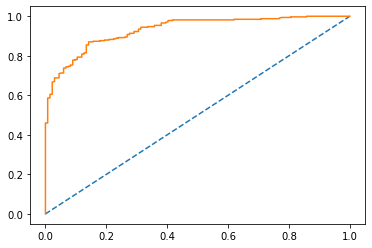

In [990]:
probs_test = gbc_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)

1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. 

Done under questions 1.4,1.5,1.6 for easy understandability.

PROBLEM 2

2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [104]:
import numpy as np
import pandas as pd
from nltk.stem.snowball import SnowballStemmer
import json
import re
import random
import string
from sklearn.feature_extraction.text import TfidfVectorizer


In [153]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\MAHE\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [154]:
corpus_roose= inaugural.raw('1941-Roosevelt.txt')
print(corpus_roose)

On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.

In Washington's day the task of the people was to create and weld together a nation.

In Lincoln's day the task of the people was to preserve that Nation from disruption from within.

In this day the task of the people is to save that Nation and its institutions from disruption from without.

To us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.

Lives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.

There are men who doubt this. There are men who believe that democracy, as a form 

In [222]:
corpus_roose_lower=corpus_roose.lower()
print (corpus_roose_lower)

on each national day of inauguration since 1789, the people have renewed their sense of dedication to the united states.

in washington's day the task of the people was to create and weld together a nation.

in lincoln's day the task of the people was to preserve that nation from disruption from within.

in this day the task of the people is to save that nation and its institutions from disruption from without.

to us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. if we do not, we risk the real peril of inaction.

lives of nations are determined not by the count of years, but by the lifetime of the human spirit. the life of a man is three-score years and ten: a little more, a little less. the life of a nation is the fullness of the measure of its will to live.

there are men who doubt this. there are men who believe that democracy, as a form 

In [155]:
corpus_kenn= inaugural.raw('1961-Kennedy.txt')
print(corpus_kenn)

Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.

The world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.

We dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new generation

In [223]:
corpus_kenn_lower=corpus_kenn.lower()
print (corpus_kenn_lower)

vice president johnson, mr. speaker, mr. chief justice, president eisenhower, vice president nixon, president truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. for i have sworn i before you and almighty god the same solemn oath our forebears l prescribed nearly a century and three quarters ago.

the world is very different now. for man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. and yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of god.

we dare not forget today that we are the heirs of that first revolution. let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new generation

In [156]:
corpus_nix=inaugural.raw('1973-Nixon.txt')
print(corpus_nix)

Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:

When we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.

As we meet here today, we stand on the threshold of a new era of peace in the world.

The central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.

Let us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.

This past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional friendship

In [224]:
corpus_nix_lower=corpus_nix.lower()
print (corpus_nix_lower)

mr. vice president, mr. speaker, mr. chief justice, senator cook, mrs. eisenhower, and my fellow citizens of this great and good country we share together:

when we met here four years ago, america was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.

as we meet here today, we stand on the threshold of a new era of peace in the world.

the central question before us is: how shall we use that peace? let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.

let us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of america as we enter our third century as a nation.

this past year saw far-reaching results from our new policies for peace. by continuing to revitalize our traditional friendship

2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [225]:
#1941-Roosevelt
chars_roose=len(corpus_roose_lower)
print("The number of characters is", chars_roose)
sents_roose = nltk.sent_tokenize(corpus_roose_lower)
print("The number of sentences is", len(sents_roose))
words_roose = nltk.word_tokenize(corpus_roose_lower)
print("The number of words is", len(words_roose))

The number of characters is 7571
The number of sentences is 68
The number of words is 1526


In [227]:
#1961-Kennedy
chars_kenn=len(corpus_kenn_lower)
print("The number of characters is", chars_kenn)
sents_kenn = nltk.sent_tokenize(corpus_kenn_lower)
print("The number of sentences is", len(sents_kenn))
words_kenn = nltk.word_tokenize(corpus_kenn_lower)
print("The number of words is", len(words_kenn))

The number of characters is 7618
The number of sentences is 52
The number of words is 1543


In [228]:
#1961-Kennedy
chars_nix=len(corpus_nix_lower)
print("The number of characters is", chars_nix)
sents_nix = nltk.sent_tokenize(corpus_nix_lower)
print("The number of sentences is", len(sents_nix))
words_nix = nltk.word_tokenize(corpus_nix_lower)
print("The number of words is", len(words_nix))

The number of characters is 9991
The number of sentences is 68
The number of words is 2006


2.2 Remove all the stopwords from all three speeches.

In [248]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
add_to_stop_words=['.',',','?',':','""',';','--','-',')','(', '``']
stop_words.extend(add_to_stop_words)
stop_words =set(stop_words)
print(stop_words)

{'she', 'into', 'so', 'd', "didn't", '``', 'weren', 'the', 'about', 'before', 'what', 'wouldn', 'under', 'further', 'had', 'is', "weren't", 'did', 'when', 'll', 'ma', 'very', "that'll", 'them', 'from', 'during', 'ourselves', 'than', 'it', "you'll", 'its', "haven't", 'all', 'above', "you've", "mustn't", 'once', 'at', 'isn', 'there', 'own', 'myself', 'yourself', 'such', "it's", 'now', 'were', 'has', 'here', '.', 'shan', ')', 'do', 'yours', 'not', 'theirs', 'will', 'whom', 't', 'down', 'just', 'below', 'y', "needn't", 'couldn', "isn't", 'more', "she's", 'itself', 'me', 'each', 'haven', 'out', 'and', 'you', 'again', 'through', 'other', "aren't", ';', 'after', 'be', "hasn't", 'over', 'being', 'her', 'off', 'up', 'few', "hadn't", 'this', 'wasn', 'themselves', 'been', 'ours', 'nor', 'same', 'who', "you're", 'having', 'we', 'their', 'our', 'an', 'or', 'too', 'my', 'yourselves', 'they', 'doesn', "wasn't", 'am', 'have', 'for', "mightn't", 'can', "don't", '?', 'while', '-', 'to', 'against', 'that

In [249]:
#1941-Roosevelt
words_roose
filtered_corpus_roose = [w for w in words_roose if not w.lower() in stop_words]
filtered_corpus_roose = []
for w in words_roose:
    if w not in stop_words:
        filtered_corpus_roose.append(w)
 
print(filtered_corpus_roose)
print('Number of words in the Roosevelt_corpse after removing stopwords is:',len(filtered_corpus_roose))

['national', 'day', 'inauguration', 'since', '1789', 'people', 'renewed', 'sense', 'dedication', 'united', 'states', 'washington', "'s", 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', 'lincoln', "'s", 'day', 'task', 'people', 'preserve', 'nation', 'disruption', 'within', 'day', 'task', 'people', 'save', 'nation', 'institutions', 'disruption', 'without', 'us', 'come', 'time', 'midst', 'swift', 'happenings', 'pause', 'moment', 'take', 'stock', 'recall', 'place', 'history', 'rediscover', 'may', 'risk', 'real', 'peril', 'inaction', 'lives', 'nations', 'determined', 'count', 'years', 'lifetime', 'human', 'spirit', 'life', 'man', 'three-score', 'years', 'ten', 'little', 'little', 'less', 'life', 'nation', 'fullness', 'measure', 'live', 'men', 'doubt', 'men', 'believe', 'democracy', 'form', 'government', 'frame', 'life', 'limited', 'measured', 'kind', 'mystical', 'artificial', 'fate', 'unexplained', 'reason', 'tyranny', 'slavery', 'become', 'surging', 'wave', 'future', 'free

In [250]:
#1961-Kennedy
words_kenn
filtered_corpus_kenn = [w for w in words_kenn if not w.lower() in stop_words]
filtered_corpus_kenn = []
for w in words_kenn:
    if w not in stop_words:
        filtered_corpus_kenn.append(w)
 
print(filtered_corpus_kenn)
print('Number of words in the Kennedy_corpse after removing stopwords is:',len(filtered_corpus_kenn))

['vice', 'president', 'johnson', 'mr.', 'speaker', 'mr.', 'chief', 'justice', 'president', 'eisenhower', 'vice', 'president', 'nixon', 'president', 'truman', 'reverend', 'clergy', 'fellow', 'citizens', 'observe', 'today', 'victory', 'party', 'celebration', 'freedom', 'symbolizing', 'end', 'well', 'beginning', 'signifying', 'renewal', 'well', 'change', 'sworn', 'almighty', 'god', 'solemn', 'oath', 'forebears', 'l', 'prescribed', 'nearly', 'century', 'three', 'quarters', 'ago', 'world', 'different', 'man', 'holds', 'mortal', 'hands', 'power', 'abolish', 'forms', 'human', 'poverty', 'forms', 'human', 'life', 'yet', 'revolutionary', 'beliefs', 'forebears', 'fought', 'still', 'issue', 'around', 'globe', 'belief', 'rights', 'man', 'come', 'generosity', 'state', 'hand', 'god', 'dare', 'forget', 'today', 'heirs', 'first', 'revolution', 'let', 'word', 'go', 'forth', 'time', 'place', 'friend', 'foe', 'alike', 'torch', 'passed', 'new', 'generation', 'americans', 'born', 'century', 'tempered', 'wa

In [251]:
#1961-Nixon
words_nix
filtered_corpus_nix = [w for w in words_nix if not w.lower() in stop_words]
filtered_corpus_nix = []
for w in words_nix:
    if w not in stop_words:
        filtered_corpus_nix.append(w)
 
print(filtered_corpus_nix)
print('Number of words in the Nixon_corpse after removing stopwords is:',len(filtered_corpus_nix))

['mr.', 'vice', 'president', 'mr.', 'speaker', 'mr.', 'chief', 'justice', 'senator', 'cook', 'mrs.', 'eisenhower', 'fellow', 'citizens', 'great', 'good', 'country', 'share', 'together', 'met', 'four', 'years', 'ago', 'america', 'bleak', 'spirit', 'depressed', 'prospect', 'seemingly', 'endless', 'war', 'abroad', 'destructive', 'conflict', 'home', 'meet', 'today', 'stand', 'threshold', 'new', 'era', 'peace', 'world', 'central', 'question', 'us', 'shall', 'use', 'peace', 'let', 'us', 'resolve', 'era', 'enter', 'postwar', 'periods', 'often', 'time', 'retreat', 'isolation', 'leads', 'stagnation', 'home', 'invites', 'new', 'danger', 'abroad', 'let', 'us', 'resolve', 'become', 'time', 'great', 'responsibilities', 'greatly', 'borne', 'renew', 'spirit', 'promise', 'america', 'enter', 'third', 'century', 'nation', 'past', 'year', 'saw', 'far-reaching', 'results', 'new', 'policies', 'peace', 'continuing', 'revitalize', 'traditional', 'friendships', 'missions', 'peking', 'moscow', 'able', 'establi

2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [252]:
from nltk import FreqDist

In [262]:
#1941-Roosevelt
freq_corpus_roose= FreqDist(filtered_corpus_roose)
freq_corpus_roose.most_common(3)

[('nation', 12), ('know', 10), ('spirit', 9)]

In [263]:
#1961-Kennedy
freq_corpus_kenn= FreqDist(filtered_corpus_kenn)
freq_corpus_kenn.most_common(3)

[('let', 16), ('us', 12), ('world', 8)]

In [264]:
#1961-Nixon
freq_corpus_nix= FreqDist(filtered_corpus_nix)
freq_corpus_nix.most_common(3)

[('us', 26), ('let', 22), ('america', 21)]

2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) 

In [256]:
!pip install wordcloud

In [260]:
from wordcloud import WordCloud, STOPWORDS

In [296]:
from nltk.corpus import PlaintextCorpusReader
text_corpus_roose = nltk.Text(filtered_corpus_roose)

In [297]:
words_corpus_roose = ' '.join(text_corpus_roose)

In [298]:
cleaned_corpus_roose = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [299]:
wordcloud_corpus_roose = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(cleaned_corpus_roose)

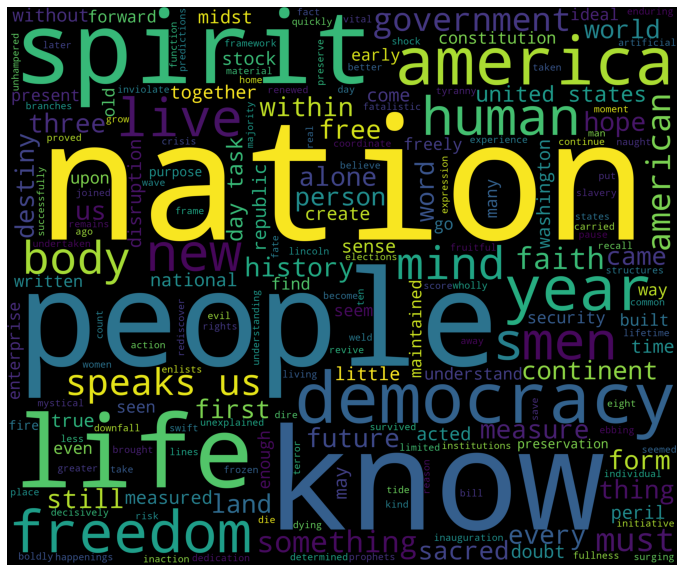

In [300]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud_corpus_roose)
plt.axis('off')
plt.show()

In [301]:
text_corpus_kenn = nltk.Text(filtered_corpus_kenn)
words_corpus_kenn = ' '.join(text_corpus_kenn)
cleaned_corpus_kenn = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [302]:
wordcloud_corpus_kenn = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(cleaned_corpus_kenn)

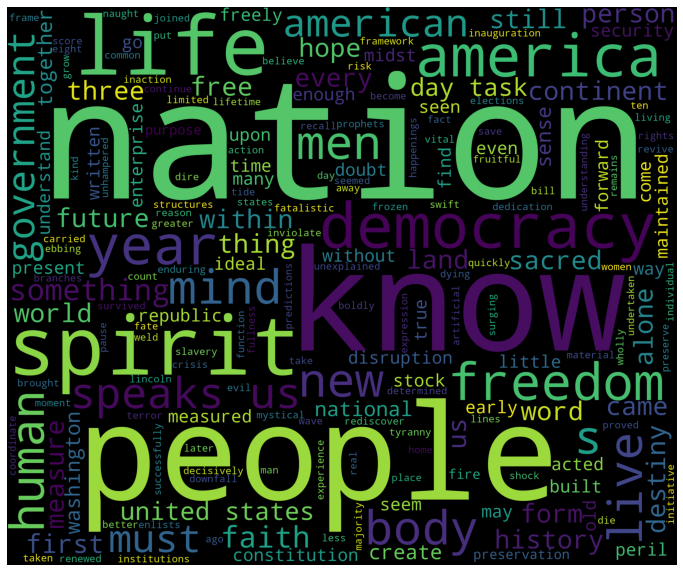

In [303]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud_corpus_kenn)
plt.axis('off')
plt.show()

In [304]:
text_corpus_nix = nltk.Text(filtered_corpus_nix)
words_corpus_nix = ' '.join(text_corpus_nix)
cleaned_corpus_nix = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [305]:
wordcloud_corpus_nix = WordCloud(stopwords=STOPWORDS,
                      width=3000,
                      height=2500
                     ).generate(cleaned_corpus_nix)

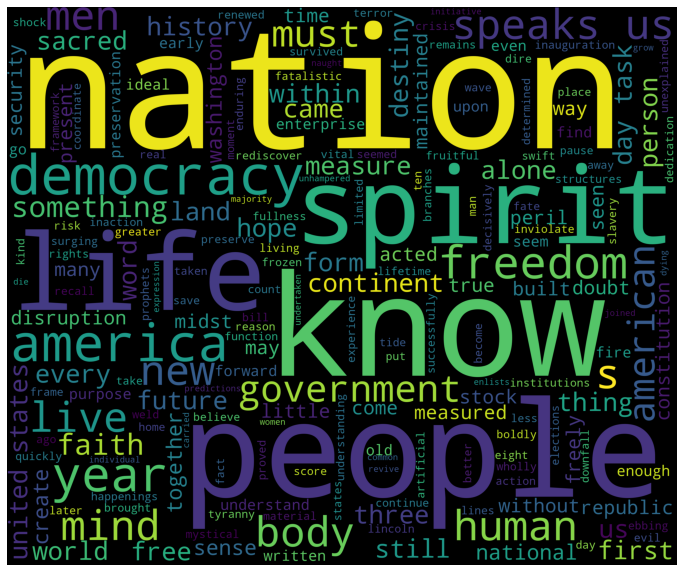

In [306]:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud_corpus_nix)
plt.axis('off')
plt.show()

THE END